In [2]:
import numpy as np

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [75]:
templates_solvent_additive = {
    "cyclic_carbonate": "[1*]C([2*])1C([1*])([2*])OC(=O)O1",
    "linear_carbonate": "[1*]OC(=O)O[2*]",
    "glyme": "C([1*])([2*])([3*])OC([4*])([5*])C([4*])([5*])OC([1*])([2*])([3*])",
    "carboxylate": "C([1*])([2*])([3*])OC(=O)[4*]",
    "thf": "C([1*])([2*])1C([1*])([2*])C([3*])([4*])OC([3*])([4*])1",
    "cyclic sulfate": "C([1*])([2*])1C([1*])([2*])OS(=O)(=O)O1", 
    "sulfone": "[1*]S(=O)(=O)[2*]",
    "sultone": "C([1*])([2*])1C([3*])([4*])C([5*])([6*])S(=O)(=O)OC([7*])([8*])1",
    "sulfite_ester": "[1*]OS(=O)O[2*]",
    "cyclic_sulfite_ester": "C1([1*])([2*])OS(=O)OC([3*])([4*])C([3*])([4*])C1([1*])([2*])",
    "sulfonyl_fluoride": "[1*]S(F)(=O)=O",
    "sulfamoyl_fluoride": "N([1*])([2*])S(=O)(=O)F",
    "dinitrile": "N#CC([1*])([2*])C([1*])([2*])C#N",
    "carbamate": "[1*]OC(=O)N([2*])([3*])",
    "methoxyalkylamine": "C([3*])([4*])([5*])OC([6*])([7*])C([8*])([9*])N([1*])([2*])",
    "phosphine": "P([1*])([2*])([3*])",
    "phosphorane": "P([1*])([2*])([3*])([4*])([5*])",
    "organophosphate": "P(=O)(O[1*])(O[1*])(O[1*])",
    "silane": "[Si]([1*])([2*])([3*])([4*])",
    "siloxane": "O([Si]([1*])([2*])[3*])[Si]([1*])([2*])[3*]",
    "borane": "B([1*])([2*])[3*]",
    "boroxine": "O1B([1*])OB([1*])OB([1*])1",
}

templates_ions = {
    "sulfonylimide": "[1*]S(=O)(=O)[N-]S(=O)(=O)[1*]",
    "organosulfate": "O=S(=O)([O-])O[1*]",
    "cyclic_borate": "O1C([3*])([4*])C(O[B-]([1*])([2*])1)([3*])([4*])",
    "cyclic_aluminate": "O1C([3*])([4*])C(O[Al-]([1*])([2*])1)([3*])([4*])",
    "cyclic_phosphate": "O1C([5*])([6*])C(O[P-]([1*])([2*])([3*])([4*])1)([5*])([6*])",
}

templates_redox_flow = {
    "anthraquinone": "O=C1c2c([1*])c([2*])c([2*])c([1*])c2C(=O)c3c([1*])c([2*])c([2*])c([1*])c13",
    "naphthoquinone": "O=C1c2c([1*])c([2*])c([2*])c([1*])c2C(=O)c([3*])c([3*])1",
    "benzoquinone": "C1([1*])=C([1*])C(=O)C([1*])=C([1*])C1=O",
    "tempo": "CC1(CC([1*])([2*])CC(N1[O])(C)C)C",
    "phthalimide": "O=C2c1c([2*])c([3*])c([3*])c([2*])c1C(=O)N([1*])2",
    "viologen": "[1*][n+]1ccc(cc1)c2cc[n+](cc2)[1*]",
    "quinoxaline": "c([1*])1c([2*])c([2*])c([1*])c2nc([3*])c([3*])nc12",
    "tetrazine": "C([1*])1=NN=C([1*])N=N1",
    "benzothiadizaole": "C([1*])1=C([2*])C2=NSN=C2C([2*])=C([1*])1",
    "pyridine_ester": "c(C(=O)(O[1*]))1c([3*])c([4*])[n+]([2*])c([4*])c([3*])1",
    "cyclopropenium": "[C+](N([1*])([2*]))2C(N([1*])([2*]))=C(N([1*])([2*]))2",
    "ptio": "[1*]C1(C([N+](=C(N1[O])C2=C([3*])C([4*])=C([5*])C([4*])=C([3*])2)[O-])([2*])[1*])[2*]",
    "phenothiazine": "c([4*])1c([3*])c([2*])c2c(c1([5*]))N([1*])c3c([5*])c([4*])c([3*])c([2*])c3S2",
}

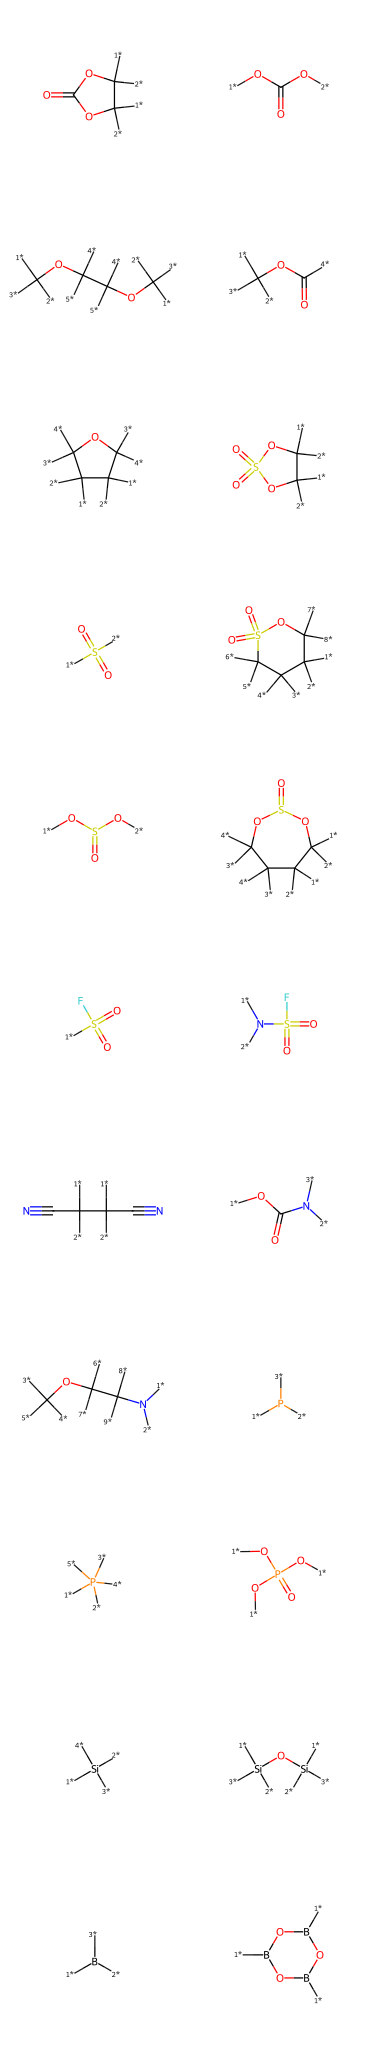

In [68]:
solvent_smiles = list()
for v in templates_solvent_additive.values():
    solvent_smiles.append(v)

solvent_smiles = np.asarray(solvent_smiles).reshape((11, 2)).tolist()
solvent_mols = [[Chem.MolFromSmiles(x) for x in row] for row in solvent_smiles]
Chem.Draw.MolsMatrixToGridImage(solvent_mols, subImgSize=(300, 300))

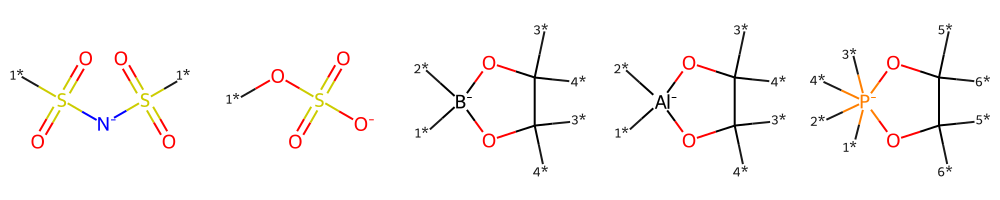

In [76]:
ions_smiles = list()
for v in templates_ions.values():
    ions_smiles.append(v)

ions_smiles = np.asarray(ions_smiles).tolist()
ions_mols = [[Chem.MolFromSmiles(x) for x in ions_smiles]]
Chem.Draw.MolsMatrixToGridImage(ions_mols, subImgSize=(200, 200))

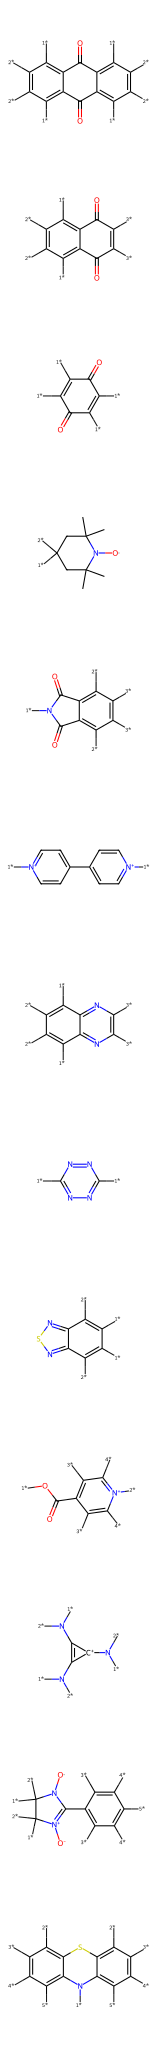

In [74]:
redox_smiles = list()
for v in templates_redox_flow.values():
    redox_smiles.append(v)

redox_smiles = np.asarray(redox_smiles).reshape((13, 1)).tolist()
redox_mols = [[Chem.MolFromSmiles(x) for x in row] for row in redox_smiles]
Chem.Draw.MolsMatrixToGridImage(redox_mols, subImgSize=(300, 300))

In [22]:
templates_ilesw_cation = {
    "sulphonium": "[S+]([1*])([2*])([3*])",
    "ammonium": "[N+]([1*])([2*])([3*])([4*])",
    "phosphonium": "[P+]([1*])([2*])([3*])([4*])",
    "tetrazolium": "c([3*])1nnn([1*])[n+]([2*])1",
    "triazolium": "c([3*])1n([1*])nc([4*])[n+]([2*])1",
    "guanidinium": "N([1*])([1*])C(=[N+]([3*])([3*]))N([2*])([2*])",
    "imidazolium": "c([1*])1n([2*])c([3*])c([4*])[n+]([5*])1",
    "pyridazinium": "c([1*])1c([2*])c([3*])n[n+]([4*])c([5*])1",
    "122-triazole": "[N+]([1*])([1*])=c1n([2*])n([3*])c([4*])n1",
    "thiazolium": "C([1*])([1*])1C([2*])([2*])SC([3*])=[N+]([4*])1",
    "pyridinium": "c([1*])1c([2*])c([3*])c([4*])[n+]([5*])c([6*])1",
    "pyrroline": "C([1*])([1*])1C([2*])([2*])C([3*])([3*])C([4*])=[N+]([5*])1",
    "oxazolidinium": "C([1*])([1*])1OC([2*])([2*])C([3*])([3*])[N+]([4*])([4*])1",
    "imidazolidine": "[N+]([1*])([1*])=C1N([2*])C([3*])([3*])C([4*])([4*])N([5*])1",
    "pyrrolidinium": "C([1*])([1*])1C([2*])([2*])C([3*])([3*])C([4*])([4*])[N+]([5*])([5*])1",
    "oxadiazine": "[N+]([1*])([1*])=C1N([2*])C([3*])([3*])OC([4*])([4*])N([5*])1",
    "morpholinium": "C([1*])([1*])1C([2*])([2*])OC([3*])([3*])C([4*])([4*])[N+]([5*])([4*])1",
    "piperazinium": "C([1*])([1*])1C([2*])([2*])N([3*])C([4*])([4*])C([5*])([5*])[N+]([6*])([6*])1",
    "pyrimidine": "[N+]([1*])([1*])=C1N([2*])C([3*])([3*])C([4*])([4*])C([5*])([5*])N([6*])1",
    "piperidinium": "C([1*])([1*])1C([2*])([2*])C([3*])([3*])C([4*])([4*])[N+]([5*])([5*])C([6*])([6*])1",
    "iosquinolinium": "c([1*])1c([2*])c([3*])c2c(c([4*])1)c([5*])[n+]([6*])c([7*])c([8*])2"
}

templates_ilesw_anion = {
    "azanide": "[N-]([1*])([2*])",
    "methanide": "[C-]([1*])([2*])([3*])",
    "methanoate": "[O-]C([1*])=O",
    "tetrahydroborate": "[B-]([1*])([2*])([3*])([4*])",
    "tetrahydroaluminate": "[Al-]([1*])([2*])([3*])([4*])",
    "tetrahydrogalldate": "[Ga-]([1*])([2*])([3*])([4*])",
    "tetrahydroindate": "[In-]([1*])([2*])([3*])([4*])",
    "hydrogen sulfite": "[O-]S([1*])(=O)=O",
    "glycinate": "[O-]C(=O)C([1*])([1*])N([2*])([2*])",
    "hexahydrophosphate": "[P-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroarsenate": "[As-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroniobate": "[Nb-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "hexahydroantimonate": "[Sb-]([1*])([2*])([3*])([4*])([5*])([6*])",
    "acetate": "[O-]C(=O)[1*]",
    "hexahydrotantalate": "[Ta-]([1*])([2*])([3*])([4*])([5*])([6*])"
}

substituents_ilesw_cation = [
    "C",
    "N",
    "Br",
    "I",
    "C#C",
    "C=C",
    "CC",
    "CC#C",
    "CC=C",
    "CCC",
    "CCN",
    "CNC",
    "CC=O",
    "COC",
    "CCO",
    "NNN",
    "CCF",
    "ONO",
    "CC(C)C",
    "CCCC",
    "CCCN",
    "CC1CO1",
    "CC(O)C",
    "COCC",
    "CCCO",
    "CCCF",
    "C[Si](C)C",
    "CCCBr",
    "CCCC#C",
    "CCCCC",
    "CCC(C)C",
    "CCCCN",
    "CCCCO",
    "CCCOC",
    "CCOCC",
    "CC(N)(N)N",
    "CC(CN)O",
    "CCOC=O",
    "COC(=O)C",
    "OCC(O)C",
    "BrC=C(Br)C",
    "BrCC(Br)C",
    "c1ccccc1",
    "CCCCCC",
    "c1cccnc1",
    "CCCCCN",
    "CCCCOC",
    "CCOC(=O)C",
    "CCCC(=O)O",
    "OCCOCC",
    "CCC(F)(F)F",
    "FC(C(F)F)F",
    "Cc1ccccc1",
    "CCCCCCC",
    "CCCCCOC",
    "OCC(C(C)C)C",
    "CCOC(=O)CC",
    "CCCOC(=O)C",
    "CCCCOC=O",
    "COCCOCC",
    "COCOCCO",
    "CCO[Si](C)(C)C",
    "CCC(=C(F)F)F",
    "CC(C(F)(F)F)O",
    "CCCS(=O)(=O)O",
    "Cc1cccc(c1)C",
    "Cc1ccc(cc1)C",
    "CCc1ccccc1",
    "Cc1ccccc1C",
    "CCCCCCCC",
    "COc1ccccc1",
    "OCC(CC(C)C)C",
    "CCCCCCOC",
    "CCCCCOCC",
    "CCN(C(=O)C)CC",
    "CCCCNC(=O)C",
    "CCCCOC(=O)C",
    "CCCC(=O)OCC",
    "OCCNCC(O)C",
    "CCOCC(F)(F)F",
    "CCSc1nnco1",
    "CCCCS(=O)(=O)O",
    "CCCCS(=O)(=O)Cl",
    "CCCc1ccccc1",
    "CCCCCCCCC",
    "CCCCn1cccc1",
    "CC(=O)c1ccccc1",
    "CCCCCCCOC",
    "CCCCN(C(=O)C)C",
    "CCCCCOC(=O)C",
    "CCC(C(Br)(F)F)(Br)F",
    "CCC(CCC=C(C)C)C",
    "CCCCCCCCCC",
    "CCCCCCCCOC",
    "CCCCCCOC(=O)C",
    "COCCOCCOCC",
    "CCCCSc1nnco1",
    "CCP(=O)(OCC)OCC",
    "CCCCCCCCCCC",
    "CC(OCc1ccccc1)C",
    "CCCCCCCCCOC",
    "CCC(=O)Nc1ccccc1",
    "CCCCCCOC(=O)C=C",
    "CCCP(=O)(OCC)OCC",
    "CCCSC(=S)N(CC)CC",
    "CCCSC(=S)n1cncc1",
    "CCCCCCCCCCCC",
    "COc1cc(C)ccc1C(C)C",
    "CCCCCCCCCCOC",
    "CCCNCc1ccccc1O",
    "CCCCCCCCOC(=O)C",
    "CCCSC(=S)N1CCOCC1",
    "CCCCCCCCCCCCC",
    "CCCCCCCCCCCOC",
    "CCCCCCCSc1nnco1",
    "SCC(=O)OCC(OC(=O)CS)C",
    "CCCCCCCCCCCCCC",
    "CCCCCCCCCCCCOC",
    "O=CC(C(C(C(=O)O)(F)F)(F)F)(F)F",
    "CCC(C(S(F)(F)(F)(F)F)(F)F)(F)F",
    "CCCCCCCCCCCCCCC",
    "CCCCN(C(=S)SCCC)CCCC",
    "CCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F",
    "CCCCCCCCCCCCCCCC",
    "CCOCC(C(C(C(F)F)(F)F)(F)F)(F)F",
    "CCCCC(C(S(F)(F)(F)(F)F)(F)F)(F)F",
    "CCCCCCCCCCCCn1cccc1",
    "CCCCCCCCCCCCCCCCCC",
    "CCCSC(=S)N(c1ccccc1)c1ccccc1",
    "CCCCCCCCCCCCCCCCCCCC",
    "CCOCCOc1ccc(cc1)C(CC(C)(C)C)(C)C",
    "CCC(C(C(C(S(F)(F)(F)(F)F)(F)F)(F)F)(F)F)(F)F",
    "CCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F",
    "CCCSC(=S)N(CCCCCCCC)CCCCCCCC",
    "FC(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)F",
    "CCC(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F"
]

substituents_ilesw_anion = [
    "C",
    "N",
    "O",
    "F",
    "S",
    "Cl",
    "Br",
    "I",
    "CC",
    "CN",
    "CCC",
    "CCN",
    "CCCN",
    "CC(=O)O",
    "CCCC",
    "CC(C)C",
    "C(C)CC",
    "CCCS",
    "CSCC",
    "FC(F)F",
    "CS(=O)=O",
    "FS(=O)=O",
    "CCCCC",
    "CCCCN",
    "CCC(=O)N",
    "CCC(=O)O",
    "CCCCCC",
    "COC(F)(F)F",
    "Cc1ccccc1",
    "COCCOCC",
    "FC(C(F)(F)F)F",
    "FC(S(=O)=O)(F)F",
    "CCCCNC(=N)N",
    "OC(=O)c1ccccc",
    "CCCC(C(F)(F)F)(F)F",
    "FC(C(C(F)(F)F)(F)F)F",
    "FC(C(F)(F)F)(S(=O)=O)F",
    "FC(C(C(C(F)(F)F)(F)F)(F)F)F",
    "O=S(=O)C(C(C(F)(F)F)(F)F)(F)F",
    "FC(c1cccc(c1)C(F)(F)F)(F)F",
    "FC(CC[Si](c1ccccc1)(C)C)(F)F",
    "O=S(=O)C(C(C(C(F)(F)F)(F)F)(F)F)(F)F",
    "CCCCCCCC[Si](c1ccccc1)(C)C",
    "FC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(c1ccccc1)F",
    "FC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(CC[Si](c1ccccc1)(C)C)F"
]

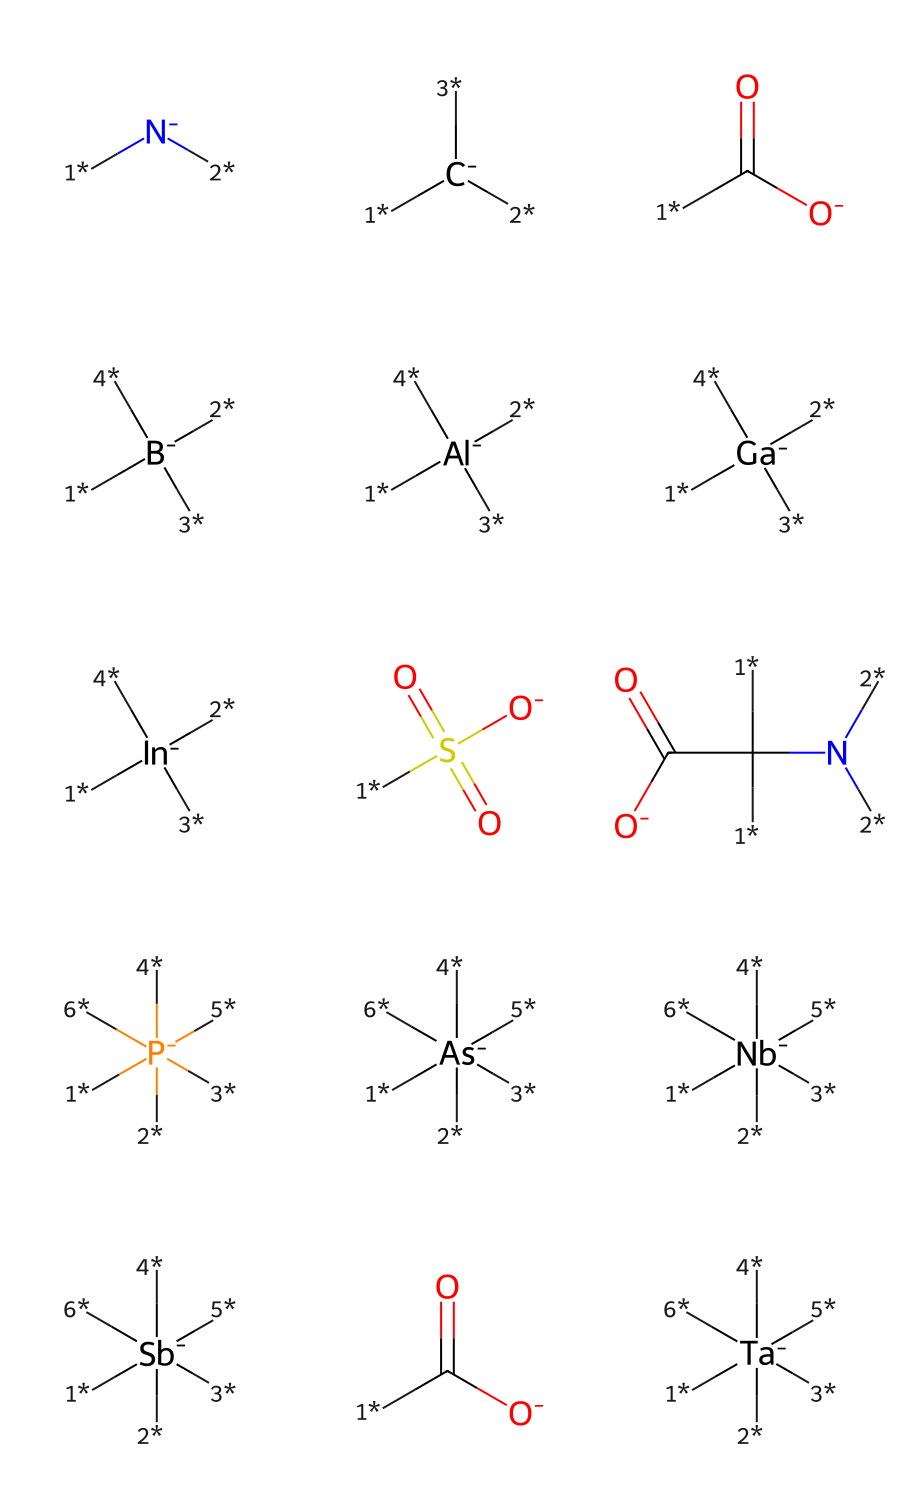

In [98]:
# cation_smiles = list()
# for v in templates_ilesw_cation.values():
#     cation_smiles.append(v)

# cation_smiles = np.asarray(cation_smiles).reshape((7, 3)).tolist()
# cation_mols = [[Chem.MolFromSmiles(x) for x in row] for row in cation_smiles]
# Chem.Draw.MolsMatrixToGridImage(cation_mols, subImgSize=(300, 300))

anion_smiles = list()
for v in templates_ilesw_anion.values():
    anion_smiles.append(v)

anion_smiles = np.asarray(anion_smiles).reshape((5, 3)).tolist()
anion_mols = [[Chem.MolFromSmiles(x) for x in row] for row in anion_smiles]
Chem.Draw.MolsMatrixToGridImage(anion_mols, subImgSize=(300, 300))

In [106]:
mod_mol = Chem.ReplaceSubstructs(Chem.MolFromSmiles("C([1*])([1*])1C([2*])([2*])C([3*])([3*])C([4*])([4*])[N+]([5*])([5*])1"), 
                                 Chem.MolFromSmiles('[1*]'), 
                                 Chem.MolFromSmiles("FC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(c1ccccc1)F"))

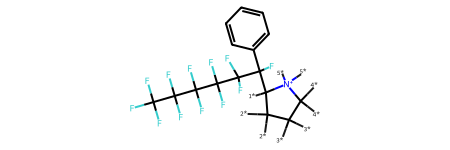

In [107]:
mod_mol[0]

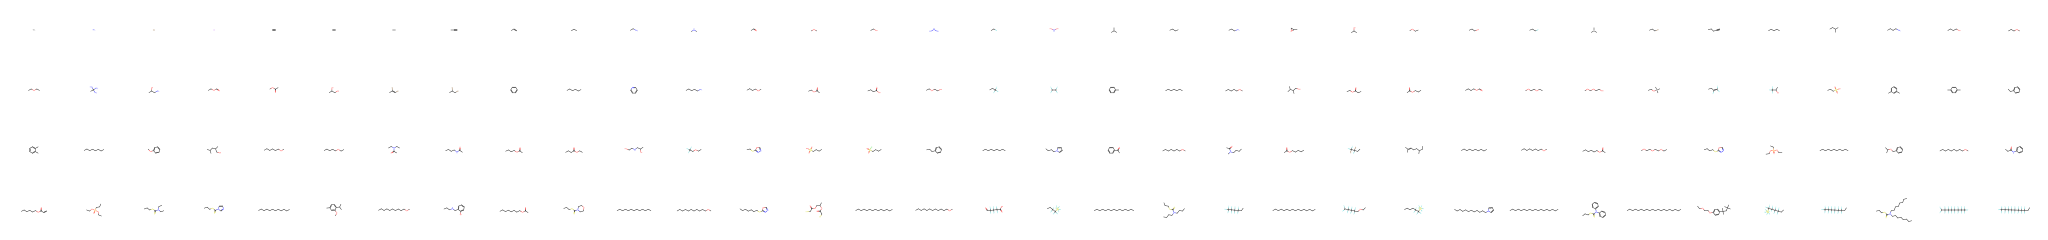

In [119]:
sub_smiles = list()
for v in substituents_ilesw_cation:
    sub_smiles.append(v)

sub_smiles = np.asarray(sub_smiles).reshape((4, 34)).tolist()
sub_mols = [[Chem.MolFromSmiles(x) for x in row] for row in sub_smiles]
Chem.Draw.MolsMatrixToGridImage(sub_mols, maxMols=300, subImgSize=(300, 300))

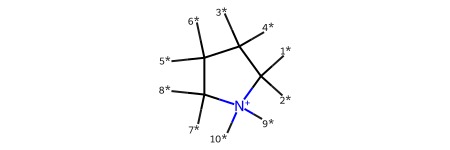

In [5]:
mol = Chem.MolFromSmiles("C([1*])([2*])1C([3*])([4*])C([5*])([6*])C([7*])([8*])[N+]([9*])([10*])1")
mol

[13:50:47] WARNING: not removing hydrogen atom without neighbors


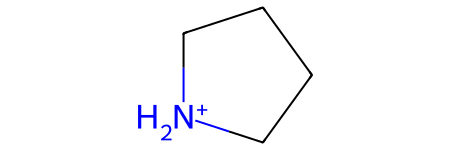

In [37]:
mod_mol = Chem.ReplaceSubstructs(Chem.MolFromSmiles("C1C([3*])CC[NH2+]1"), 
                                 Chem.MolFromSmiles('[3*]'), 
                                 Chem.MolFromSmiles("[H]"))
mod_mol[0]
new_mol = Chem.RemoveHs(mod_mol[0])
smiles = Chem.MolToSmiles(new_mol)
new_mol_again = Chem.MolFromSmiles(smiles)
new_mol_again

In [18]:
mol = Chem.MolFromSmiles("C1CCC[NH2+]1")
with_h = Chem.AddHs(mol)
no_h = Chem.RemoveHs(mol)
with_h.GetNumAtoms()
# Chem.rdmolops.GetFormalCharge(mol)
# conf = mol.GetConformer(1)
# conf

15

In [21]:
import re

attach = re.compile(r"\[\d+\*\]")
smiles = "C([1*])([2*])1C([3*])([4*])C([5*])([6*])C([7*])([8*])[N+]([9*])([5*])1"
res = attach.findall(smiles)

In [22]:
import random
random.sample(res, 1)

['[5*]']

In [50]:
from openbabel import pybel

mol = pybel.readstring("smi", "C1CCC[NH2+]1")
inchi = mol.write(format="inchi")
print(mol.charge)
print(mol.spin)
mol.addh()
mol.make3D()
mol.localopt()
print(mol.charge)
print(mol.spin)

1
1
1
1


*** Open Babel Warning  in InChI code
  #1 :Proton(s) added/removed


In [48]:
mol_3d.charge

AttributeError: 'NoneType' object has no attribute 'charge'

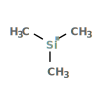

In [55]:
pybel.readstring("smi", "[Si](C)(C)(C)")